<h3>Scraping and Saving Data</h3>

<p>Importing beautifulsoup modules to scrape chapter number and date of publication.
Importing selenium to scrape javascript of comments per chapter.
Each url corresponds to a different online webnovel from popular online novel translation website Wuxiaworld.com.
<br><br>
Scrapes these 3 data points and saves to .csv file.</p>

In [ ]:
from bs4 import BeautifulSoup
import requests
import time
import csv

from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait #makes it wait
from selenium.webdriver.support import expected_conditions as EC #waits until condition met
from selenium.common.exceptions import TimeoutException #if neither wait nor condition met, throw exception
from selenium.common.exceptions import NoSuchElementException 

file1 = 'atg_comment_data.csv'
file2 = 'rot_comment_data.csv' 
file3 = 'wmw_comment_data.csv'
file4 = 'rge_comment_data.csv'
file5 = 'mga_comment_data.csv'
file6 = 'og_comment_data.csv'

with open(file6, 'w') as new_file:
    
    csv_writer = csv.writer(new_file)

    #header row
    #this needs to be outside of loop
    csv_writer.writerow(['chapter', 'comments','date']) 
    
    for page in range(1, 1001): #CHANGE HERE
        url1 = 'https://www.wuxiaworld.com/novel/against-the-gods/atg-chapter-' + str(page)
        url2 = 'https://www.wuxiaworld.com/novel/rebirth-of-the-thief-who-roamed-the-world/rotwrtw-chapter-' + str(page)
        url3 = 'https://www.wuxiaworld.com/novel/warlock-of-the-magus-world/wmw-chapter-' + str(page)
        url4 = 'https://www.wuxiaworld.com/novel/renegade-immortal/rge-chapter-' + str(page)
        url5 = 'https://www.wuxiaworld.com/novel/martial-god-asura/mga-chapter-' + str(page)
        url6 = 'https://www.wuxiaworld.com/novel/overgeared/og-chapter-' + str(page)
        
        chrome_path = r'/Users/thomas/Downloads/chromedriver'
        driver = webdriver.Chrome(chrome_path)
        
        driver.set_page_load_timeout(5)
        try:
            driver.get(url1) #CHANGE HERE
            driver.execute_script("window.scrollTo(0, document.body.scrollHeight);") #scroll to bottom of page 
            time.sleep(1) #waits x seconds while number of reviews load
            comments = driver.find_element_by_id('comments').text.split()[0] 
            driver.quit() #close selenium tab
        except (NoSuchElementException, TypeError, TimeoutException):
            comments = 0
            driver.quit()
        
        source = requests.get(url1).text #CHANGE HERE
        soup = BeautifulSoup(source, "html5lib")
  
        try:
            chapter = soup.find('div', class_='panel panel-default').h4.text.split()[1]
            date = soup.find('meta', property='article:published_time')["content"].split()[0]
        except TypeError:
            chapter = 0
            date = 0
        
        csv_writer.writerow([chapter, comments, date])
    
    new_file.close()

<h3>Visualization</h3>

<p>Load ATG novel scraped data and clean data set.<br>
Put graphs into subplots to compare and try to find any trends or correlations.<br>
Custom tick marks for each novel's chapter, comment, and date ticks depending on range of gathered data.</p>

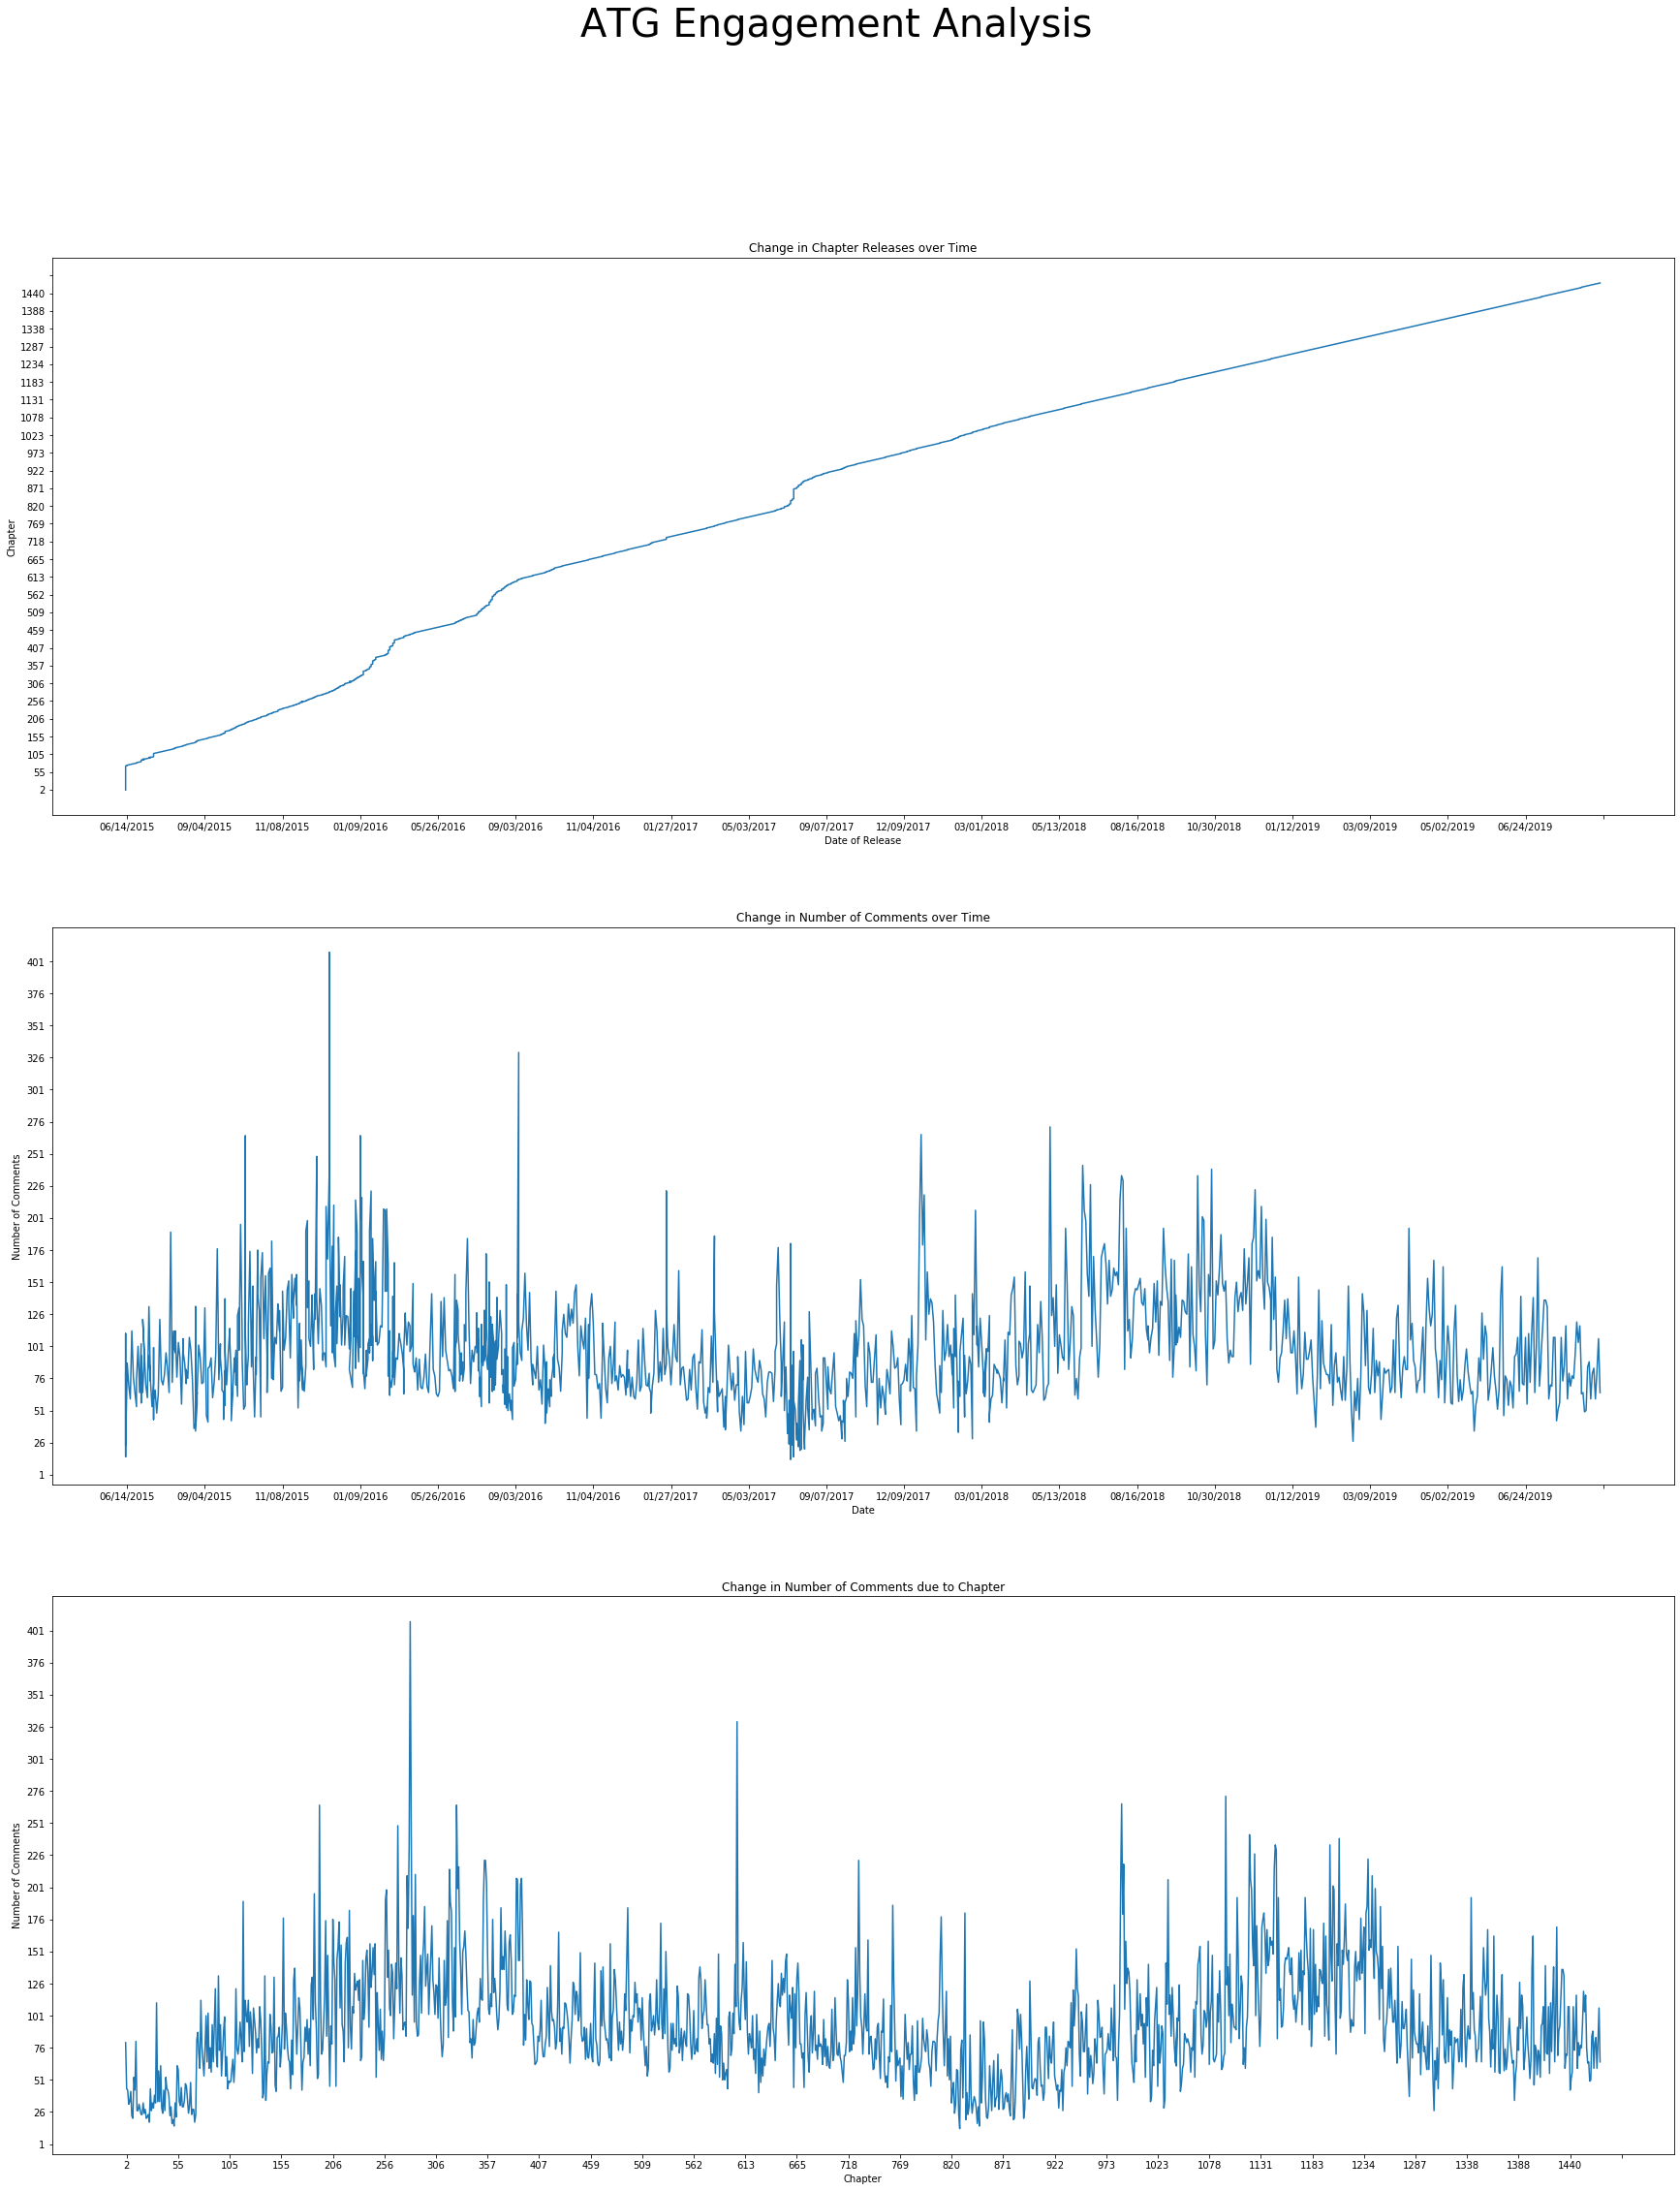

In [9]:
%matplotlib inline
import pandas as pd
import numpy as np
from IPython.display import display

from matplotlib import pyplot as plt
from matplotlib import style
from matplotlib.pyplot import figure

chaptertick = list(range(1,1500,50))
commenttick = list(range(1,425,25))
datetick = list(range(1,1000,50))

data = pd.read_csv("atg_final_data.csv") 

fig, (ax1,ax2,ax3) = plt.subplots(nrows=3, ncols =1,figsize =(30,36))
ax1.plot(data.date, data.chapter)
ax1.set_title('Change in Chapter Releases over Time')
ax1.set_xlabel('Date of Release')
ax1.set_xticks(datetick)
ax1.set_ylabel('Chapter')
ax1.set_yticks(chaptertick)

ax2.plot(data.date, data.comments)
ax2.set_title('Change in Number of Comments over Time')
ax2.set_xlabel('Date')
ax2.set_xticks(datetick)
ax2.set_ylabel('Number of Comments')
ax2.set_yticks(commenttick)

ax3.plot(data.chapter, data.comments)
ax3.set_title('Change in Number of Comments due to Chapter')
ax3.set_xlabel('Chapter')
ax3.set_xticks(chaptertick)
ax3.set_ylabel('Number of Comments')
ax3.set_yticks(commenttick)

fig.suptitle('ATG Engagement Analysis', fontsize=40)
plt.show()

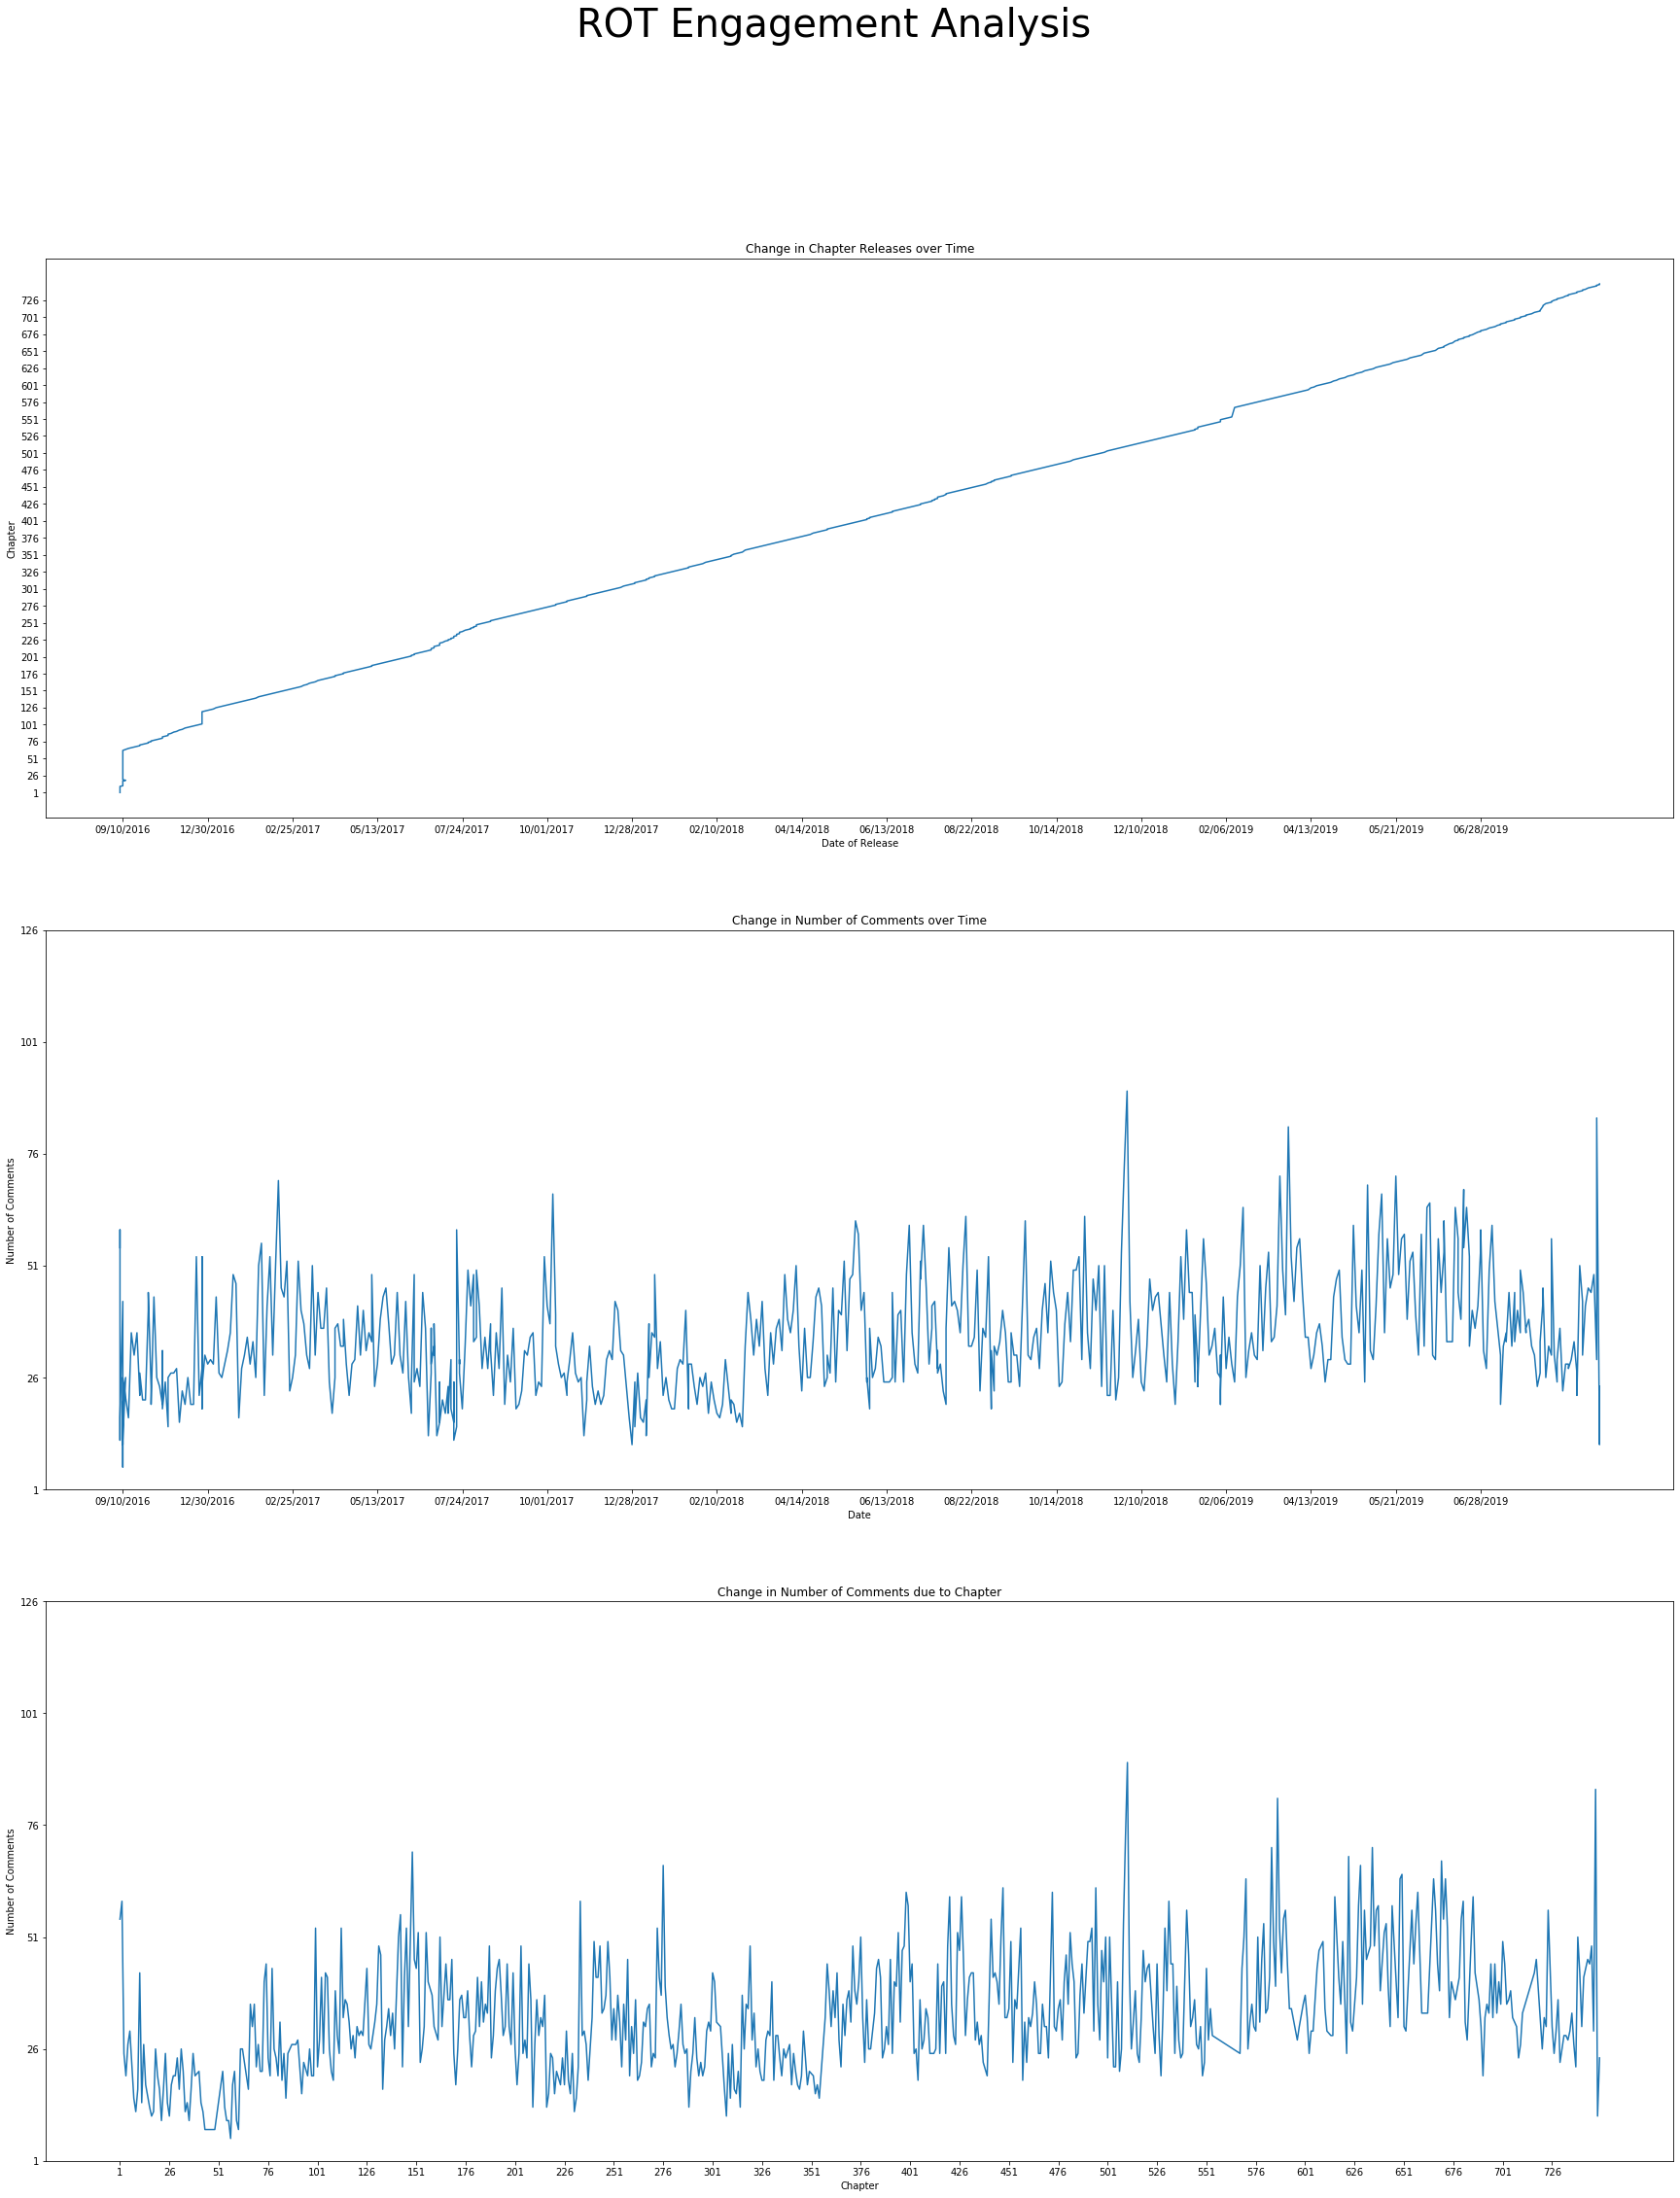

In [10]:
%matplotlib inline
import pandas as pd
import numpy as np
from IPython.display import display

from matplotlib import pyplot as plt
from matplotlib import style
from matplotlib.pyplot import figure

chaptertick = list(range(1,750,25))
commenttick = list(range(1,150,25))
datetick = list(range(1,500,30))

data = pd.read_csv("rot_comment_data.csv") 

#get rid of rows where comment column has a value of 0
data = data[data.comments !='0']
data = data[data.comments !=0]

fig, (ax1,ax2,ax3) = plt.subplots(nrows=3, ncols =1,figsize =(30,36))
ax1.plot(data.date, data.chapter)
ax1.set_title('Change in Chapter Releases over Time')
ax1.set_xlabel('Date of Release')
ax1.set_xticks(datetick)
ax1.set_ylabel('Chapter')
ax1.set_yticks(chaptertick)

ax2.plot(data.date, data.comments)
ax2.set_title('Change in Number of Comments over Time')
ax2.set_xlabel('Date')
ax2.set_xticks(datetick)
ax2.set_ylabel('Number of Comments')
ax2.set_yticks(commenttick)

ax3.plot(data.chapter, data.comments)
ax3.set_title('Change in Number of Comments due to Chapter')
ax3.set_xlabel('Chapter')
ax3.set_xticks(chaptertick)
ax3.set_ylabel('Number of Comments')
ax3.set_yticks(commenttick)


fig.suptitle('ROT Engagement Analysis', fontsize=40)
plt.show()

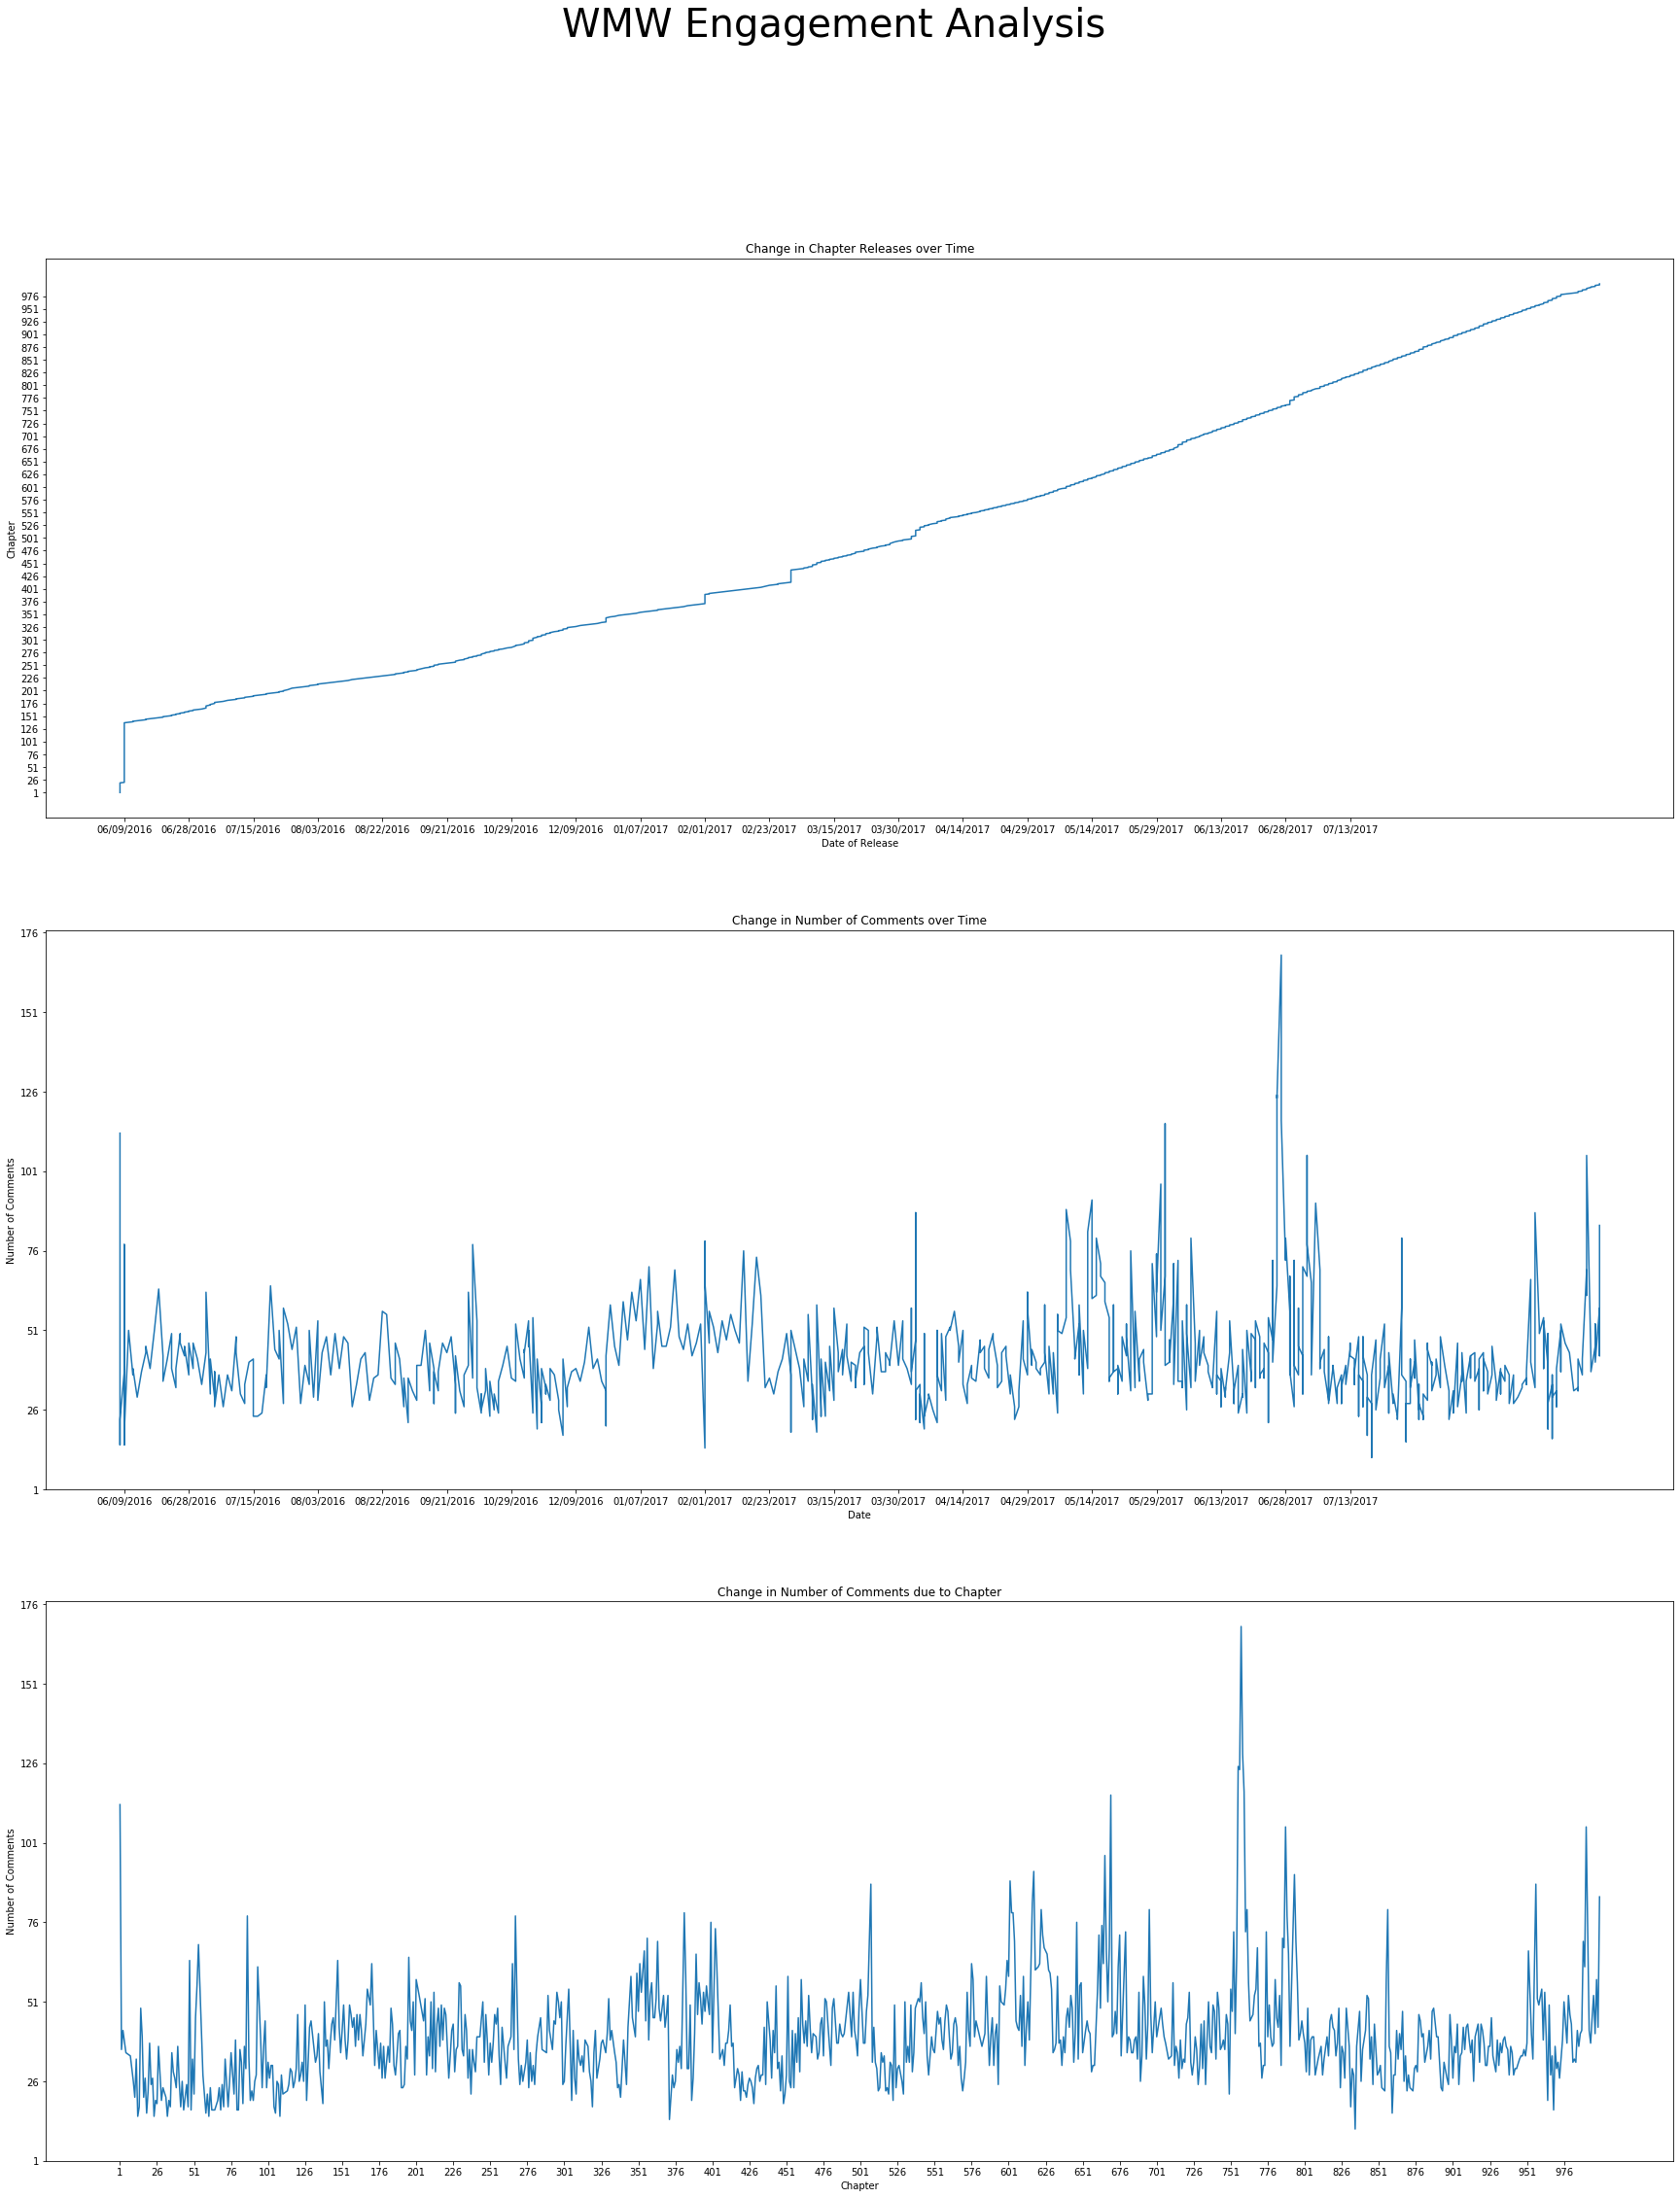

In [24]:
%matplotlib inline
import pandas as pd
import numpy as np
from IPython.display import display

from matplotlib import pyplot as plt
from matplotlib import style
from matplotlib.pyplot import figure

chaptertick = list(range(1,1000,25))
commenttick = list(range(1,200,25))
datetick = list(range(1,300,15))

data = pd.read_csv("wmw_comment_data.csv") 

#get rid of rows where comment column has a value of 0
data = data[data.comments !='0']
data = data[data.comments !=0]

fig, (ax1,ax2,ax3) = plt.subplots(nrows=3, ncols =1,figsize =(30,36))
ax1.plot(data.date, data.chapter)
ax1.set_title('Change in Chapter Releases over Time')
ax1.set_xlabel('Date of Release')
ax1.set_xticks(datetick)
ax1.set_ylabel('Chapter')
ax1.set_yticks(chaptertick)

ax2.plot(data.date, data.comments)
ax2.set_title('Change in Number of Comments over Time')
ax2.set_xlabel('Date')
ax2.set_xticks(datetick)
ax2.set_ylabel('Number of Comments')
ax2.set_yticks(commenttick)

ax3.plot(data.chapter, data.comments)
ax3.set_title('Change in Number of Comments due to Chapter')
ax3.set_xlabel('Chapter')
ax3.set_xticks(chaptertick)
ax3.set_ylabel('Number of Comments')
ax3.set_yticks(commenttick)


fig.suptitle('WMW Engagement Analysis', fontsize=40)
plt.show()

<h3>Conclusion</h3>

<p>Operating on the assumption that a higher number of comments equates to more website engagement, more time spent on the page, and more time seeing advertisements.<br><br>
According to the graphs above, when there are multiple chapters released in one day, there are a lower number of comments. One prediction of why there are a lower number of comments is that people prefer to read the next chapter if one is available (binge read in general) rather than spend time commenting. 
    
<br><br>This makes it preferable to release chapters on a consistent basis rather than push out multiple at once (even if the author has been on a hiatus and is due to release a multiple chapters to catch up).</p>